In [1]:
%matplotlib inline
from IPython.display import Image
import os
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set the paths
datapth = os.path.join('..', 'test-swr', 'swr007')

In [2]:
sobj = flopy.utils.SwrStage(os.path.join(datapth, 'mh2013ex1.stg'))
s = sobj.get_data(idx=0)

sobj0 = flopy.utils.SwrStage(os.path.join(datapth, '.cmp', 'mh2013ex1.stg.cmp'))
s0 = sobj0.get_data(idx=0)

In [3]:
x = np.cumsum(np.ones(s.shape[0], dtype=np.float)*92.5) - 92.5/2.
slope = (13.94444444 - 13.83333333) / 92.5
z = 13.94444444 - slope * (x - 92.5/2.)

#### Plot the data from the binary SWR Process stage file

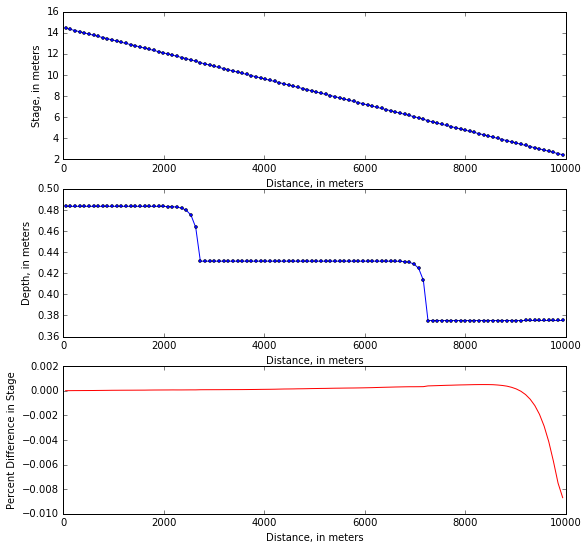

In [4]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(3, 1, 1)
ax.plot(x, s['stage'], color='blue')
ax.plot(x, s0['stage'], color='blue', lw=0, marker='o', ms=3)
ax.set_ylabel('Stage, in meters')
ax.set_xlabel('Distance, in meters')

ax = fig.add_subplot(3, 1, 2)
ax.plot(x, s['stage']-z, color='blue')
ax.plot(x, s0['stage']-z, color='blue', lw=0, marker='o', ms=3)
ax.set_ylabel('Depth, in meters')
ax.set_xlabel('Distance, in meters')

ax = fig.add_subplot(3, 1, 3)
ax.plot(x, 100.*(s['stage']-s0['stage'])/s0['stage'], color='red')
ax.set_ylabel('Percent Difference in Stage')
ax.set_xlabel('Distance, in meters')